In [1]:
import numpy as np
import matplotlib.pyplot as plt
from geneticalgorithm import geneticalgorithm as ga

import geometry
import mesh
from stress_strain_analysis import stress_strain_analysis

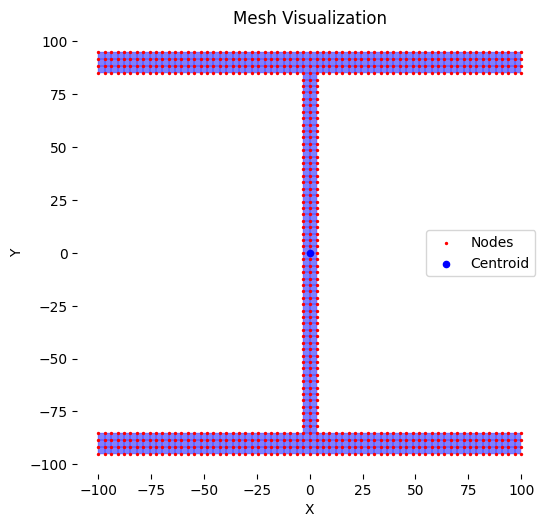

In [2]:
H    = geometry.H_beam(web_width     =   6.5,
                       web_height    = 170.0,
                       flange_width  = 200.0,
                       flange_height =  10.0)
Mesh = mesh.Mesh(H, "quadrilateral", 3)
Mesh.plot()

In [3]:
Analysis = stress_strain_analysis(Mesh, Nx=300, My=40)

 The best solution found:                                                                           
 [2.79798921e-04 5.43316851e-06]

 Objective function:
 0.0030573495132749143


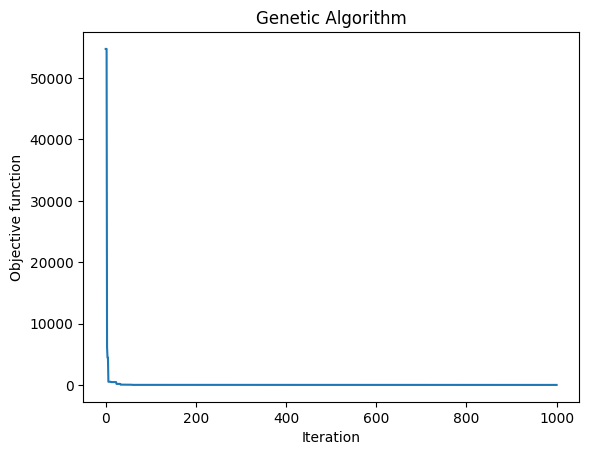

Nx =  299.9584334343687 kN
My =  40.03646327103943 kNm


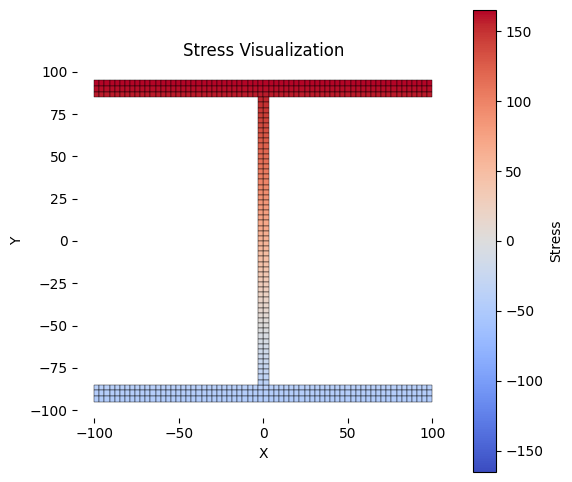

In [4]:
varbound=np.array([[- 0.001,  0.001],
                   [-0.0001, 0.0001]])

algorithm_param = {'max_num_iteration': 1000,\
                   'population_size':20,\
                   'mutation_probability':0.5,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': 0.1,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}

model=ga(function=Analysis.find_strain_and_curvature,
         dimension=2,
         variable_type='real',
         variable_boundaries=varbound,
         algorithm_parameters=algorithm_param)

model.run()

eps, xsi = model.best_variable
Analysis.set_strain_and_curvature(eps, xsi)
Analysis.calculate_strains()
Analysis.calculate_stresses()
print("Nx = ", Analysis.get_section_forces()[0], "kN")
print("My = ", Analysis.get_section_forces()[1], "kNm")
Analysis.plot_stresses()